# Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from scipy.stats import skew

# Import library untuk modelling/analysis
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

# Import library untuk deployment
import pickle

print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


# EDA (Exploratory Data Analysis)

## Menampilkan dataset

In [2]:
data = pd.read_csv('Hapus null & duplikat.csv')
data.head()

,Jenis_Rumah,Lokasi,KT,KM,Garasi_Null,Garasi,LT,LB,Harga,Harga_New,Juta
0,Rumah,"Tembalang, Semarang",2,1,NaN,1,60,30.0,300.0,0.3,0.001
1,Rumah,"Semarang Timur, Semarang",2,1,NaN,1,65,30.0,300.0,0.3,NaN
2,Rumah,"Gunung Pati, Semarang",2,1,1.0,1,120,32.0,300.0,0.3,NaN
3,Rumah,"Genuk, Semarang",2,1,1.0,1,60,36.0,300.0,0.3,NaN
4,Rumah,"Tembalang, Semarang",2,1,NaN,1,72,36.0,300.0,0.3,NaN


## Menghapus kolom/variabel yang tidak diperlukan

In [3]:
df_cleaning = data.drop(['Garasi_Null','Harga','Juta'], axis=1)

## Menampilkan informasi data

In [4]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  9533 non-null   object 
 1   Lokasi       9533 non-null   object 
 2   KT           9533 non-null   int64  
 3   KM           9533 non-null   int64  
 4   Garasi       9533 non-null   int64  
 5   LT           9533 non-null   int64  
 6   LB           9533 non-null   float64
 7   Harga_New    9533 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 595.9+ KB


## Mengubah tipe data

In [5]:
df_cleaning= df_cleaning.astype({'LB': 'int64'})
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Jenis_Rumah  9533 non-null   object 
 1   Lokasi       9533 non-null   object 
 2   KT           9533 non-null   int64  
 3   KM           9533 non-null   int64  
 4   Garasi       9533 non-null   int64  
 5   LT           9533 non-null   int64  
 6   LB           9533 non-null   int64  
 7   Harga_New    9533 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 595.9+ KB


## Memeriksa data null

In [6]:
df_cleaning.isna().sum()

Jenis_Rumah    0
Lokasi         0
KT             0
KM             0
Garasi         0
LT             0
LB             0
Harga_New      0
dtype: int64

## Memeriksa data duplikat

In [7]:
df_cleaning.duplicated().sum()

0

## Melihat ukuran data

In [8]:
df_cleaning.shape

(9533, 8)

## Deskripsi data statistik (numerik)

In [9]:
df_cleaning.describe()

,KT,KM,Garasi,LT,LB,Harga_New
count,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000
mean,3.326130,2.141928,1.303053,175.165425,155.920172,1.653170
std,1.350971,1.159489,0.706326,109.270013,107.200283,1.181362
min,2.000000,1.000000,1.000000,28.000000,29.000000,0.300000
25%,2.000000,1.000000,1.000000,104.000000,77.000000,0.700000
50%,3.000000,2.000000,1.000000,142.000000,124.000000,1.300000
75%,4.000000,3.000000,1.000000,210.000000,200.000000,2.300000
max,9.000000,10.000000,10.000000,912.000000,900.000000,5.000000


In [10]:
# Download df_cleaning untuk kepentingan website
df_cleaning.to_csv("df_cleaning.csv", index=False)

## Visualisasi

### Visualisasi Pairplot

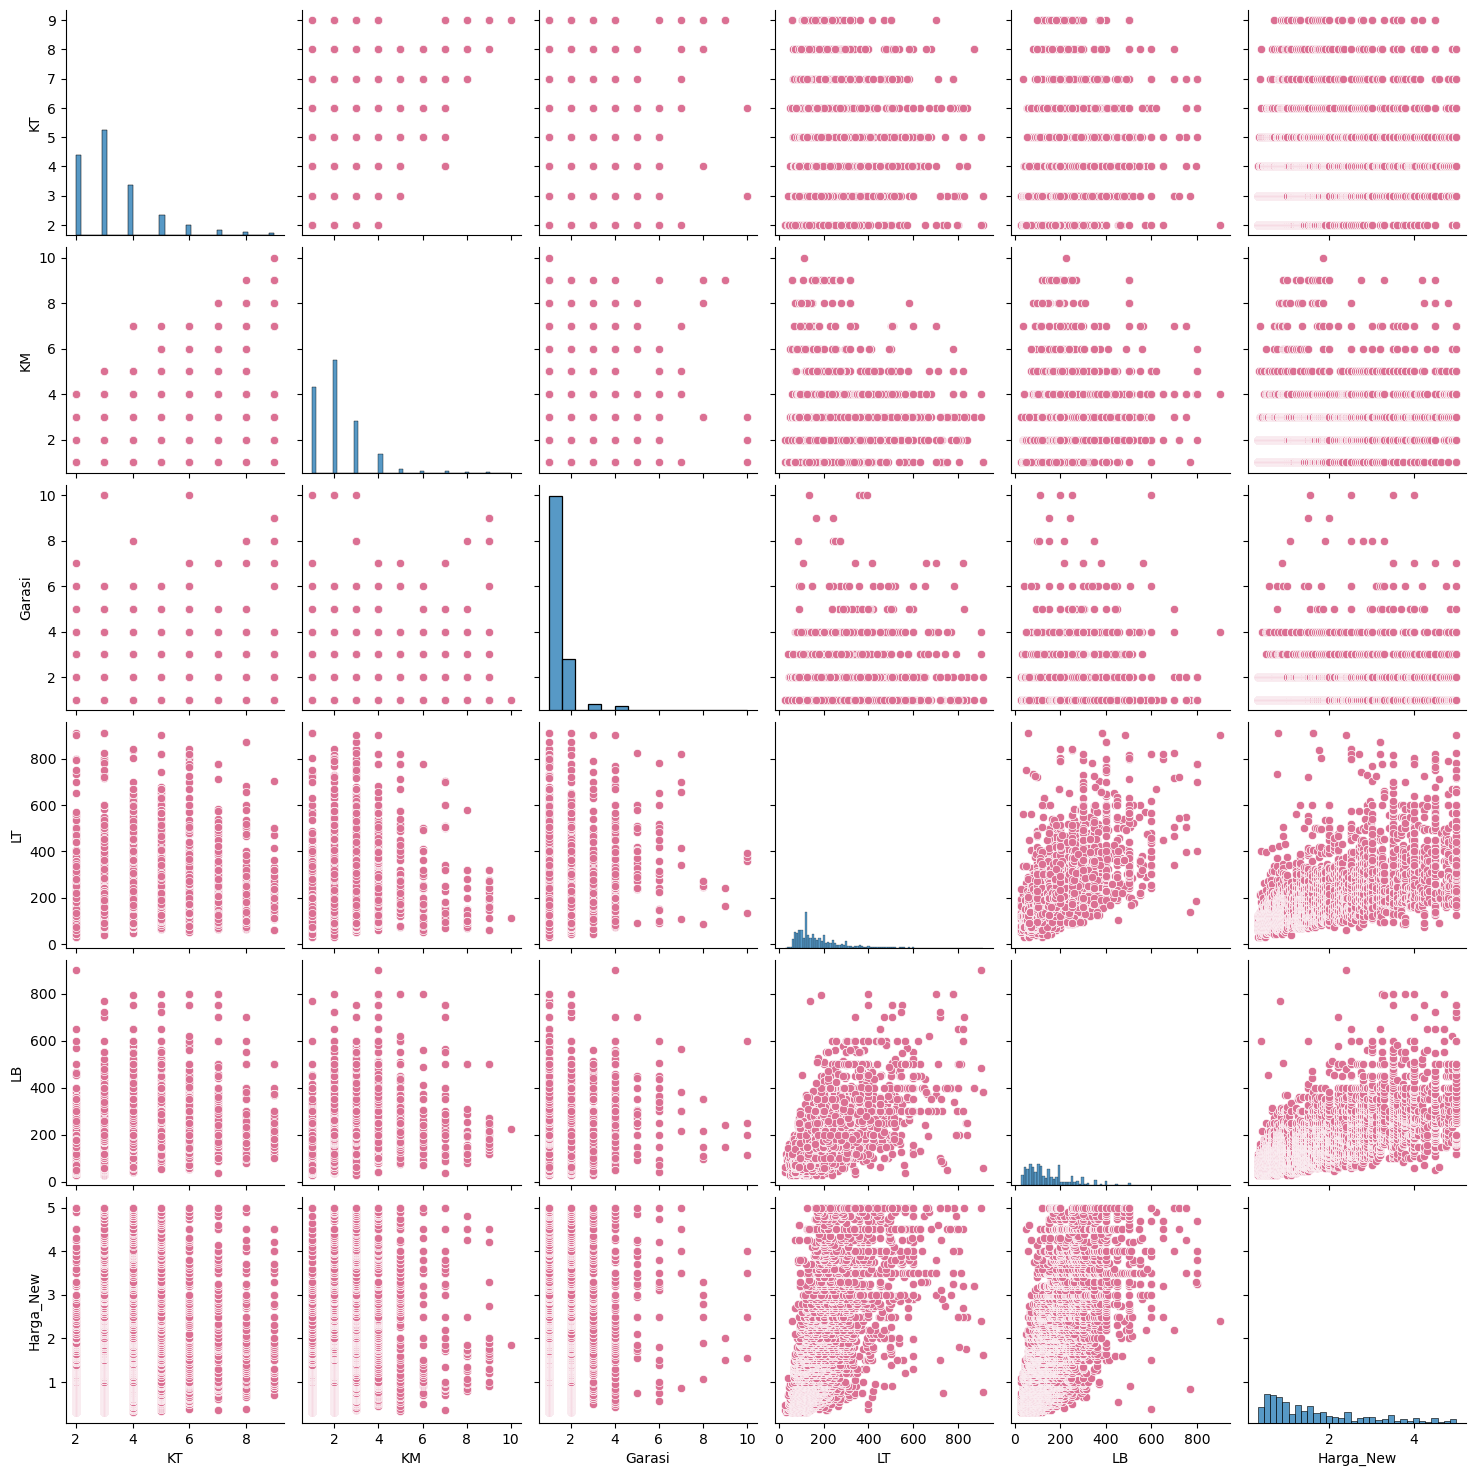

In [11]:
sns.pairplot(df_cleaning, plot_kws={'color': 'palevioletred'})
plt.show()

### Bagaimana persebaran dan persentase penjualan rumah di Kota Semarang?
#### Persebaran

In [11]:
lok = df_cleaning['Lokasi'].value_counts()
lok

Tembalang, Semarang           1504
Semarang Barat, Semarang      1465
Pedurungan, Semarang          1232
Banyumanik, Semarang          1194
Semarang Timur, Semarang       720
Ngaliyan, Semarang             703
Mijen, Semarang                507
Semarang Tengah, Semarang      479
Gunung Pati, Semarang          344
Semarang Selatan, Semarang     329
Semarang Utara, Semarang       282
Gayamsari, Semarang            246
Gajah Mungkur, Semarang        235
Candisari, Semarang            218
Genuk, Semarang                 51
Tugu, Semarang                  24
Name: Lokasi, dtype: int64

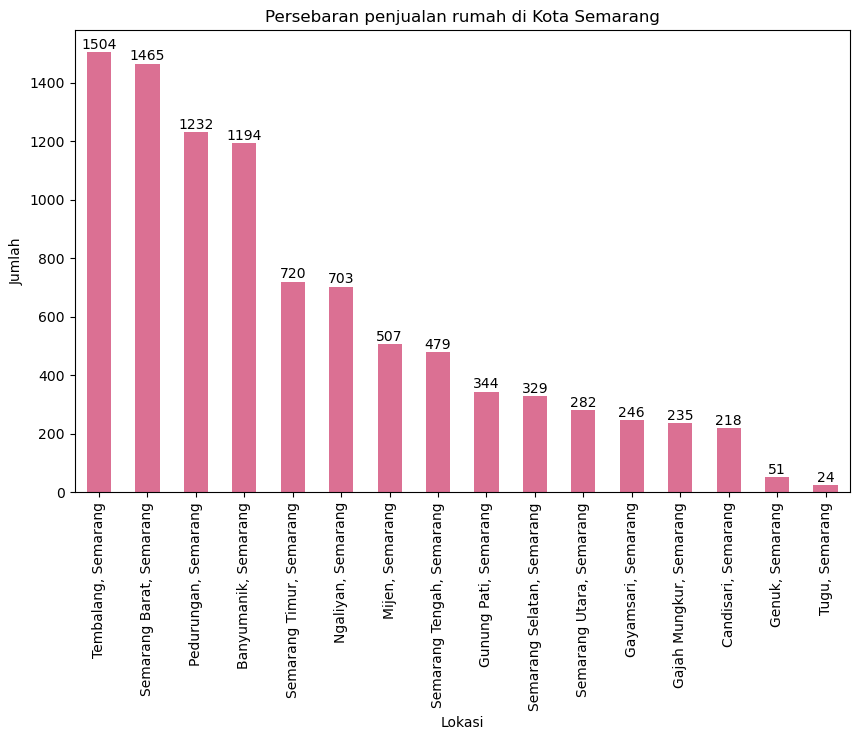

In [12]:
lok.plot(kind='bar', figsize=(10, 6), color='palevioletred')

for i, v in enumerate(lok):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Persebaran penjualan rumah di Kota Semarang')
plt.ylabel('Jumlah')
plt.xlabel('Lokasi')

plt.show()

#### Persentase

In [61]:
LK = pd.DataFrame({"Total":df_cleaning["Lokasi"].value_counts()})
LK

,Total
"Tembalang, Semarang",1504
"Semarang Barat, Semarang",1465
"Pedurungan, Semarang",1232
"Banyumanik, Semarang",1194
"Semarang Timur, Semarang",720
"Ngaliyan, Semarang",703
"Mijen, Semarang",507
"Semarang Tengah, Semarang",479
"Gunung Pati, Semarang",344
"Semarang Selatan, Semarang",329


In [62]:
total_LK = LK["Total"]

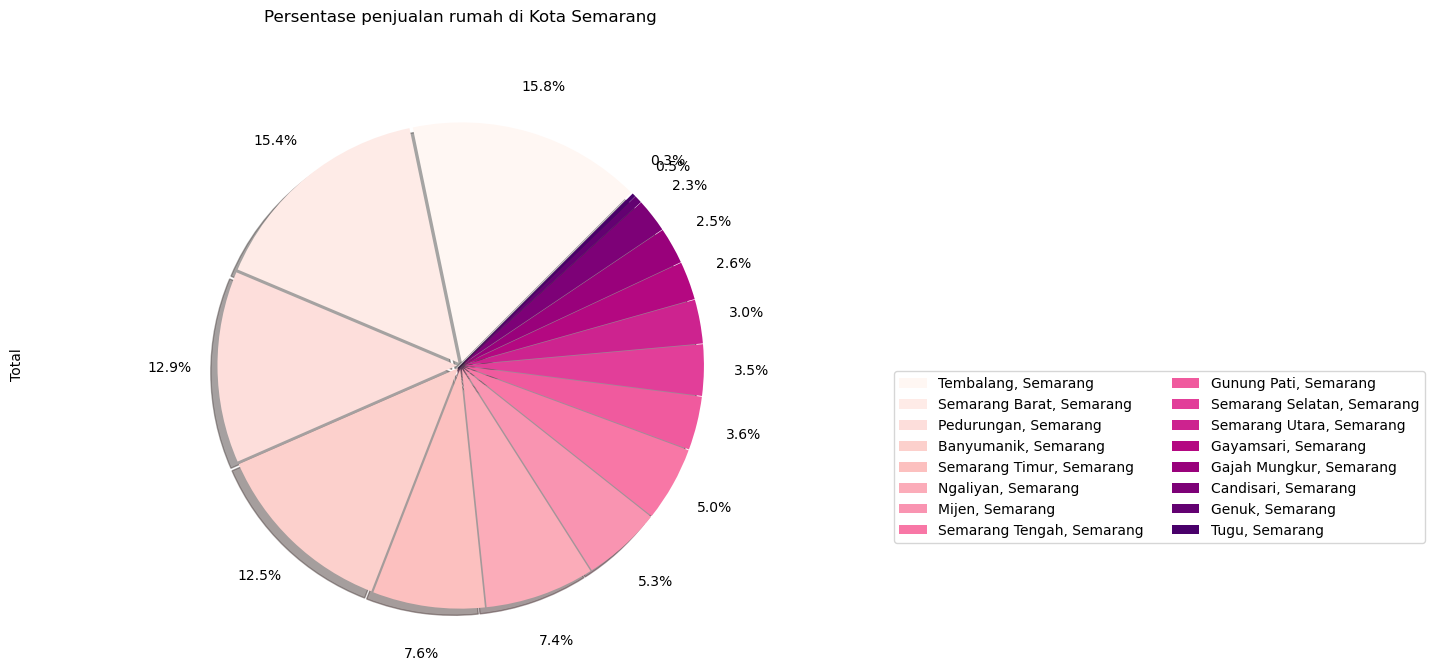

In [64]:
# Pilih palet warna 'PuRd' dan sesuaikan panjangnya dengan jumlah data
cmap = plt.get_cmap('RdPu')
colors_list = cmap(np.linspace(0, 1, len(total_LK)))  # Mengambil warna sesuai dengan jumlah data

# Pilih ukuran lingkaran (sesuaikan jumlah nilai dengan jumlah kategori)
explode_list = [0.015] * len(total_LK)
#explode_list[1] = 0.05  # Contoh untuk menyoroti satu kategori

# Tambahkan detail
total_LK.plot(kind='pie',
        figsize=(11, 7),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

# Untuk memberikan informasi daerah berwarna
plt.legend(labels=total_LK.index, loc='upper left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.axis('equal')

# Menambahkan judul
plt.title('Persentase penjualan rumah di Kota Semarang', y=1.12)

# Menampilkan
plt.show()

### Bagaimana variasi jumlah KT, KM, dan garasi?

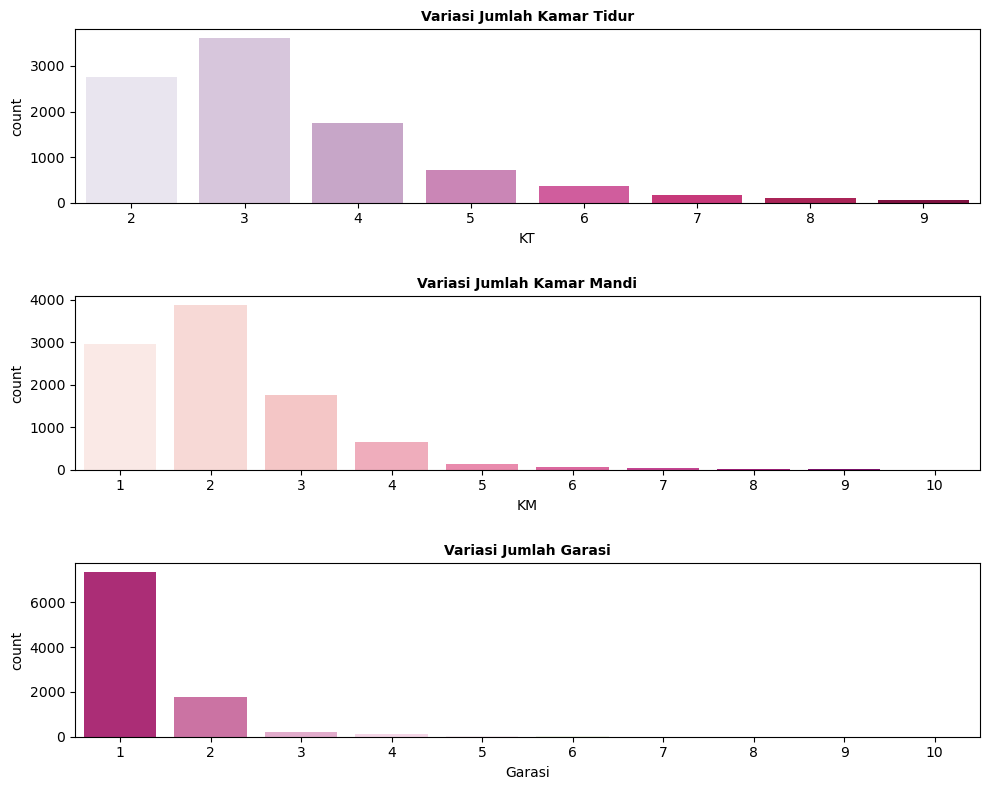

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(10,8))

# WindGustDir
sns.countplot(df_cleaning['KT'], palette='PuRd', ax=ax[0])
ax[0].set_title("Variasi Jumlah Kamar Tidur", fontweight='bold', fontsize=10)

# WindDir9am
sns.countplot(df_cleaning['KM'], palette='RdPu', ax=ax[1])
ax[1].set_title("\nVariasi Jumlah Kamar Mandi", fontweight='bold', fontsize=10)

# WindDir3pm
sns.countplot(df_cleaning['Garasi'], palette='PiYG', ax=ax[2])
ax[2].set_title("\nVariasi Jumlah Garasi", fontweight='bold', fontsize=10)
fig.tight_layout()

### Apa saja jenis rumah yang terdapat pada data tersebut?

In [17]:
JR = pd.DataFrame({"Total":df_cleaning["Jenis_Rumah"].value_counts()})
JR

,Total
Rumah,9473
Rumah\nFeatured,42
Rumah\nPremier,18


In [18]:
total_JR = JR["Total"]

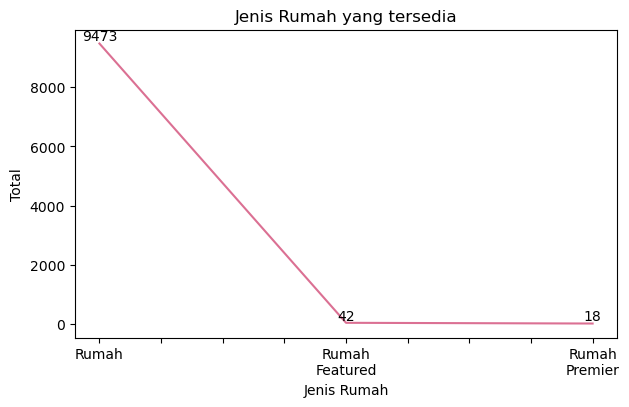

In [19]:
total_JR.plot(kind='line', figsize=(7, 4), color='palevioletred')

for i, v in enumerate(total_JR):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Jenis Rumah yang tersedia')
plt.ylabel('Total')
plt.xlabel('Jenis Rumah')

plt.show()

### Berapa rata-rata harga per lokasi?

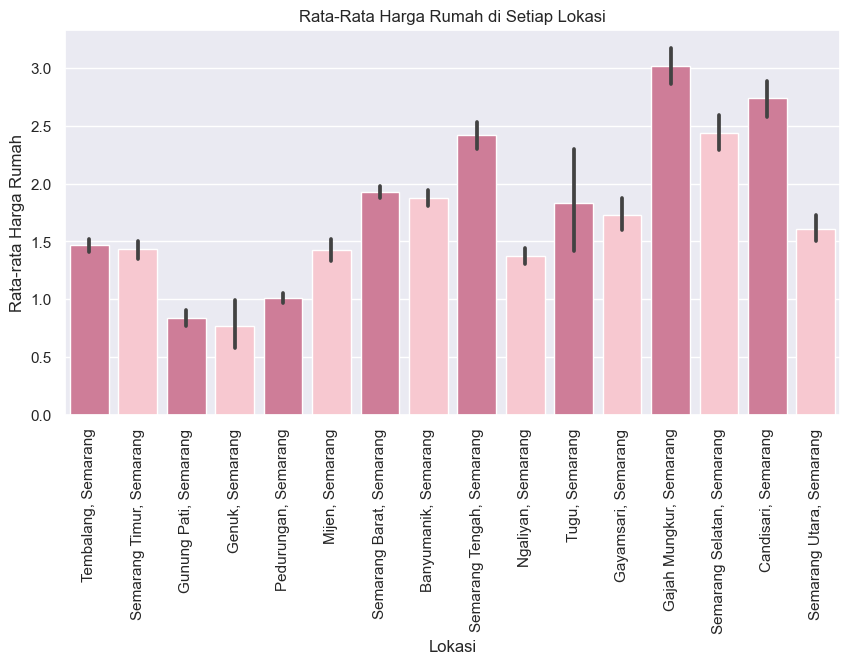

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
cols = ['palevioletred', 'pink']

plt.xticks(rotation=90)
sns.barplot(x='Lokasi', y='Harga_New', palette=cols, data=df_cleaning, estimator=np.mean)

plt.title('Rata-Rata Harga Rumah di Setiap Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Rata-rata Harga Rumah')
plt.show()

### Apakah ada korelasi antara jumlah KT, jenis rumah dan harga rumah?

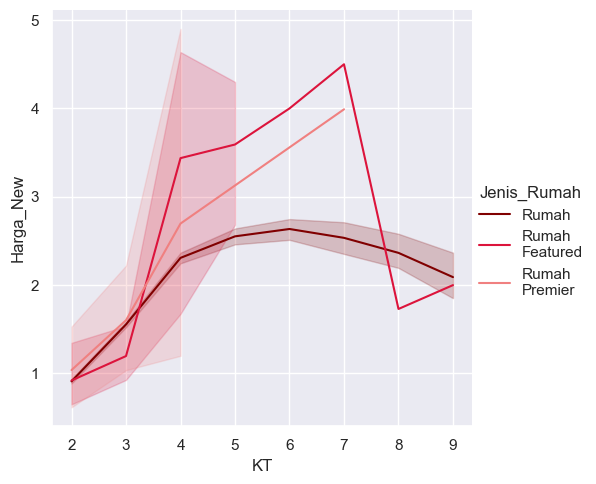

In [21]:
cols = ['maroon','crimson','lightcoral']
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='KT',
            y='Harga_New',
            hue='Jenis_Rumah',
            data=df_cleaning,
            palette = cols
           )


### Apakah LT dan LB dapat mempengaruhi harga rumah?

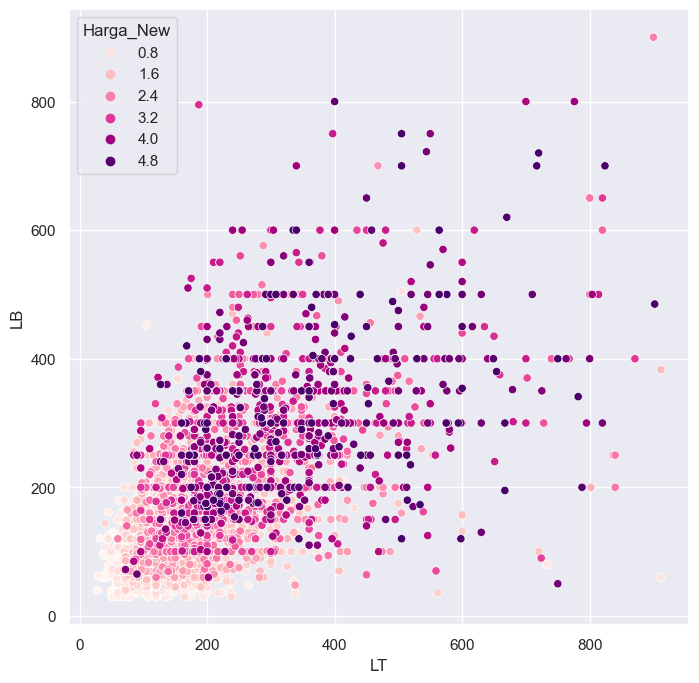

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='LT', y='LB', hue='Harga_New', palette='RdPu', data=df_cleaning)
plt.show()

## Analisis korelasi


In [23]:
# Membuat fungsi heat_map dengan 2 parameter
# nama df adalah nama datasetnya, list kolom adalah list korelasi yang ingin di cek
def heat_map(nama_df,list_kolom): 
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran
    
    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(), 
                annot=True, 
                cmap="PuRd", 
                linewidths=.5, 
                linecolor='black', 
                square=True) 

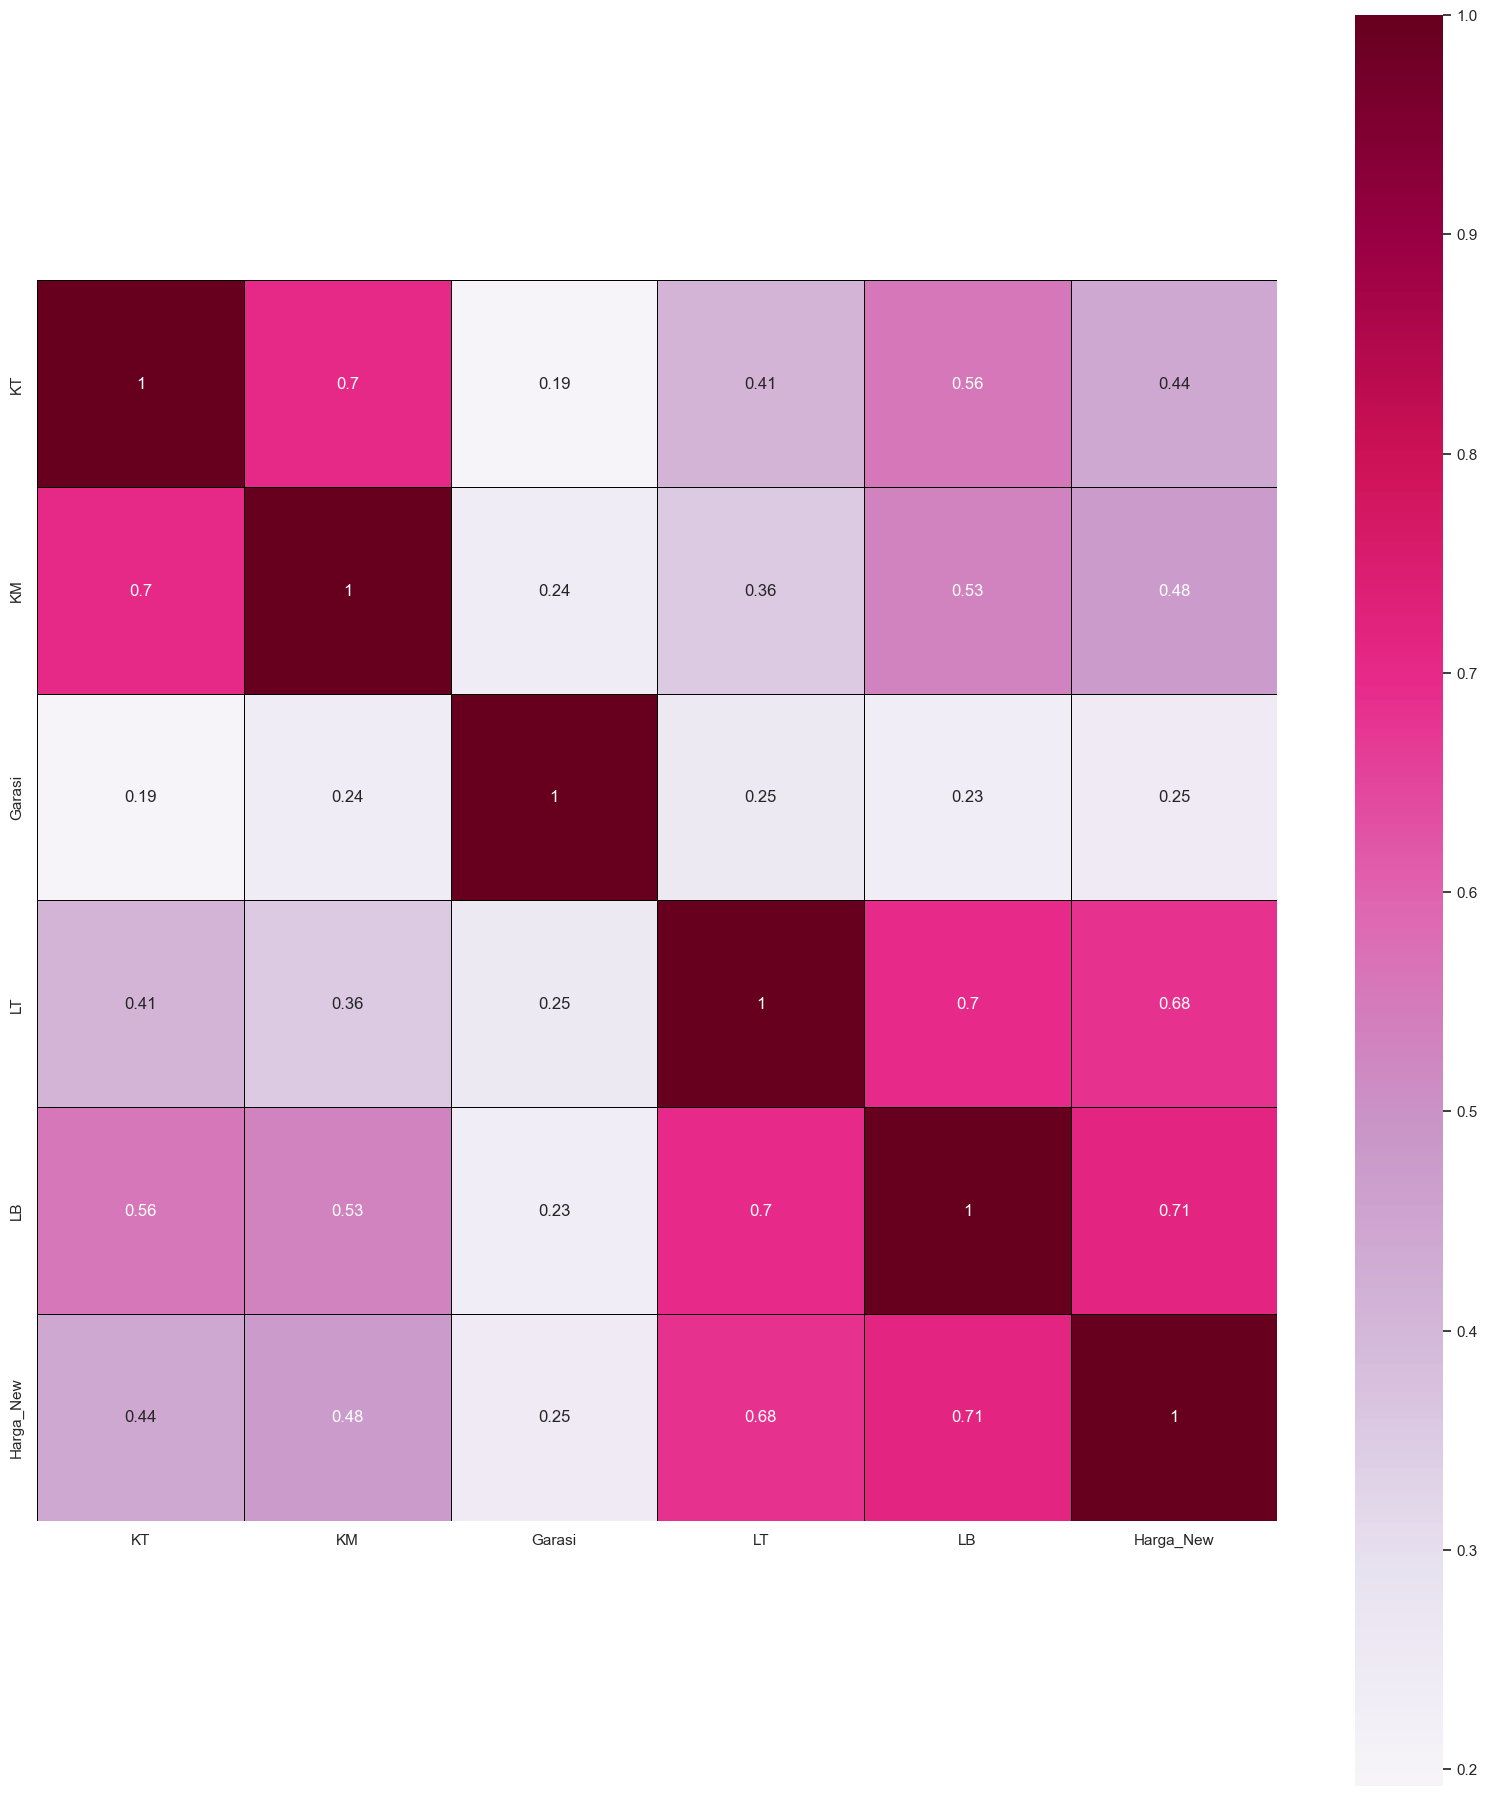

In [24]:
heat_map_modeling1 = ["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","Harga_New"]
heat_map(df_cleaning,heat_map_modeling1)

# Data Pre-processing

## Cardinality 
Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [13]:
# Menggunakan df_cleaning
df_card = df_cleaning.loc[:,["Jenis_Rumah","Lokasi","KT","KM","Garasi","LT","LB","Harga_New"]]

print('Jumlah kategori dalam variabel "Jenis Rumah"             : {}'.format(len(df_card.Jenis_Rumah.unique())))
print('Jumlah kategori dalam variabel "Lokasi"                  : {}'.format(len(df_card.Lokasi.unique())))
print('Jumlah kategori dalam variabel "Kamar Tidur"             : {}'.format(len(df_card.KT.unique())))
print('Jumlah kategori dalam variabel "Kamar Mandi"             : {}'.format(len(df_card.KM.unique())))
print('Jumlah kategori dalam variabel "Garasi"                  : {}'.format(len(df_card.Garasi.unique())))
print('Jumlah kategori dalam variabel "Luas Tanah"              : {}'.format(len(df_card.LT.unique())))
print('Jumlah kategori dalam variabel "Luas Bangunan"           : {}'.format(len(df_card.LB.unique())))
print('Jumlah kategori dalam variabel "Harga"                   : {}'.format(len(df_card.Harga_New.unique())))

Jumlah kategori dalam variabel "Jenis Rumah"             : 3
Jumlah kategori dalam variabel "Lokasi"                  : 16
Jumlah kategori dalam variabel "Kamar Tidur"             : 8
Jumlah kategori dalam variabel "Kamar Mandi"             : 10
Jumlah kategori dalam variabel "Garasi"                  : 10
Jumlah kategori dalam variabel "Luas Tanah"              : 500
Jumlah kategori dalam variabel "Luas Bangunan"           : 363
Jumlah kategori dalam variabel "Harga"                   : 487


## Encoding (Label encode)

In [11]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

In [12]:
# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df_cleaning.select_dtypes(include='object')
df_Lencode = df_cleaning.copy()

for column in df_category.columns:
    df_Lencode[column] = label_encoder.fit_transform(df_cleaning[column])
    
df_Lencode

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,Harga_New
0,0,14,2,1,1,60,30,0.3
1,0,12,2,1,1,65,30,0.3
2,0,5,2,1,1,120,32,0.3
3,0,4,2,1,1,60,36,0.3
4,0,14,2,1,1,72,36,0.3
...,...,...,...,...,...,...,...,...
9528,0,0,3,2,2,720,720,5.0
9529,0,12,4,4,2,505,750,5.0
9530,0,8,6,7,1,505,750,5.0
9531,0,8,7,7,2,505,750,5.0


In [13]:
df_Lencode.describe()

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,Harga_New
count,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000,9533.000000
mean,0.008182,8.038917,3.326130,2.141928,1.303053,175.165425,155.920172,1.653170
std,0.109054,4.456609,1.350971,1.159489,0.706326,109.270013,107.200283,1.181362
min,0.000000,0.000000,2.000000,1.000000,1.000000,28.000000,29.000000,0.300000
25%,0.000000,6.000000,2.000000,1.000000,1.000000,104.000000,77.000000,0.700000
50%,0.000000,9.000000,3.000000,2.000000,1.000000,142.000000,124.000000,1.300000
75%,0.000000,12.000000,4.000000,3.000000,1.000000,210.000000,200.000000,2.300000
max,2.000000,15.000000,9.000000,10.000000,10.000000,912.000000,900.000000,5.000000


## Skewness value

Jenis_Rumah skewness: 14.820710531114273


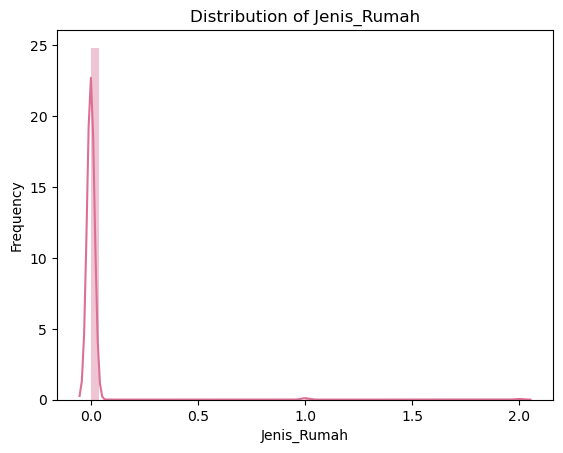

Lokasi skewness: -0.4451608777817668


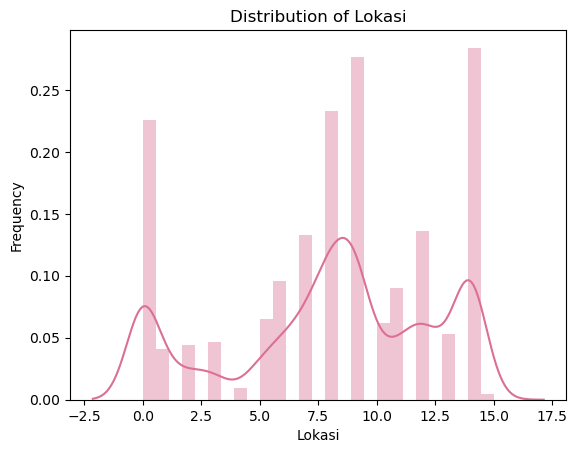

KT skewness: 1.528026437385177


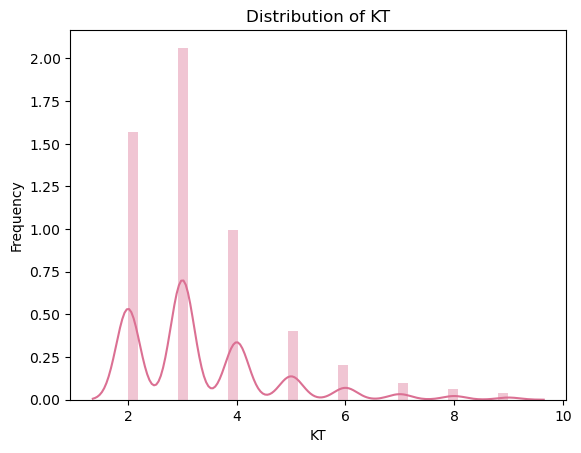

KM skewness: 1.848112240753124


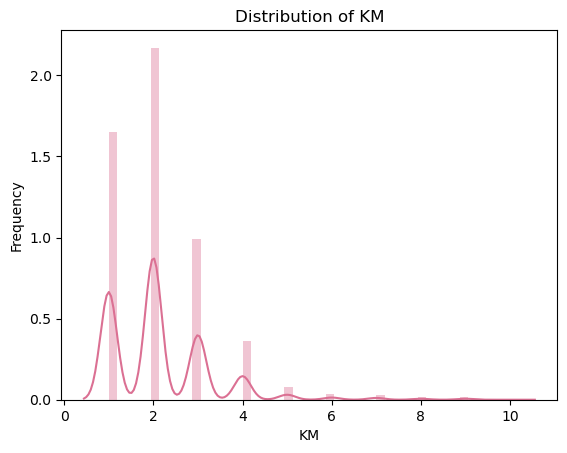

Garasi skewness: 4.161731186318472


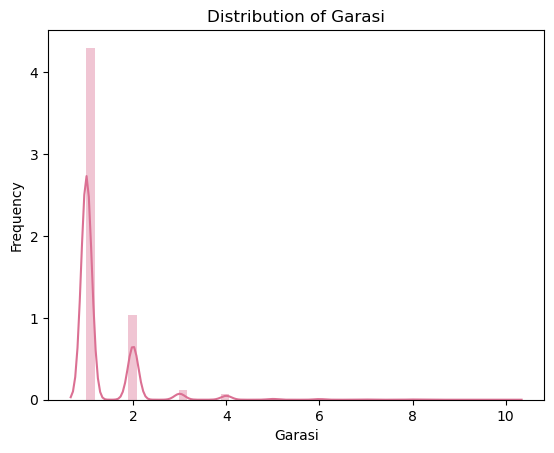

LT skewness: 2.193340684755528


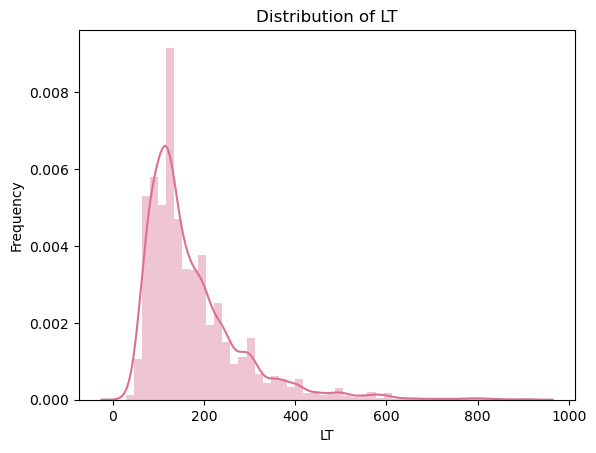

LB skewness: 1.633769394148649


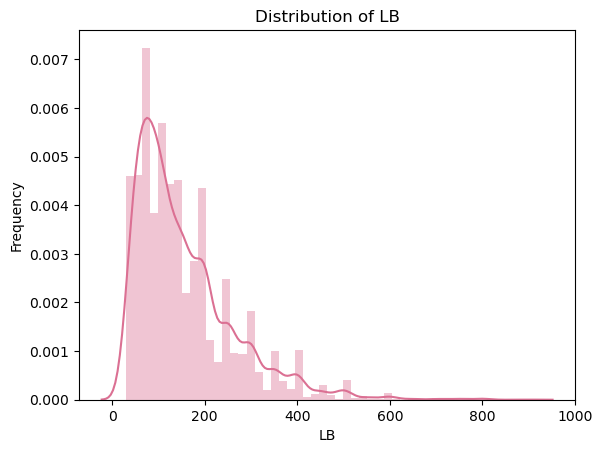

Harga_New skewness: 1.0870513855257804


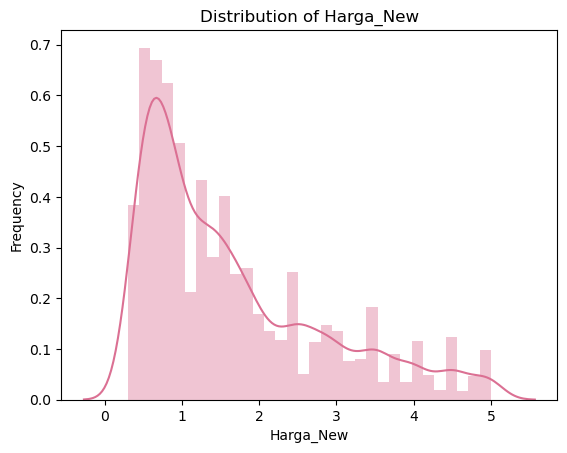

In [14]:
# Loop melalui kolom dan plot distribusinya
for col in df_Lencode:
    print(f'{col} skewness: {skew(df_Lencode[col])}')
    
    plt.figure()
    sns.distplot(df_Lencode[col], kde=True, color='palevioletred')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Pembagian train test split data
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

In [15]:
X = df_Lencode.drop(columns=["Harga_New"],axis=1)
y = df_Lencode["Harga_New"]

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [16]:
print("Jumlah data dalam data pelatihan:", len(X_train))
print("Jumlah data dalam data pengujian:", len(X_test))

Jumlah data dalam data pelatihan: 8579
Jumlah data dalam data pengujian: 954


# Multiple Linear Regression

## Pendefinisian dan modelling MLR
Mendefinisikan dan fit model linear regression.

In [17]:
LR = LinearRegression(fit_intercept = True,
                        copy_X = True,
                        n_jobs = True,
                        positive = False)

In [18]:
model_LR = LR.fit(X_train, y_train)
y_pred_lr = model_LR.predict(X_test)

## Evaluasi Model MLR
Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Pada Linear Regression didalamnya berisi :
- R-squared, MSE, RMSE
- Nilai intercept dan slope
- Melihat harga hasil prediksi dan perbandingan dengan harga aktual
- Membuat visualisasi regresi masing-masing kondisi



In [19]:
mse_lr = mean_squared_error(y_test, y_pred_lr) 
rmse_lr = np.sqrt(mse_lr)  
print('Nilai R-squared : ', r2_score(y_test, y_pred_lr)) 
print('Nilai MSE : ', mse_lr)  
print('Nilai RMSE : ', rmse_lr)  

Nilai R-squared :  0.6058937850511716
Nilai MSE :  0.5545463016838437
Nilai RMSE :  0.7446786566592625


In [20]:
coef1 = model_LR.coef_
intercept = model_LR.intercept_
print("Nilai intercept :", model_LR.intercept_)
print("Nilai slope :", model_LR.coef_)

Nilai intercept : 0.015275191930258947
Nilai slope : [ 0.1688511  -0.00242398 -0.04052201  0.16416175  0.06409059  0.00380675
  0.00443527]


In [21]:
# Koefisien regresi
coefficients = LR.coef_
# Intercept regresi
intercept = LR.intercept_

# Mencetak persamaan regresi
print("Persamaan regresi linear:")
persamaan = f"y = {intercept}"
for i, coef in enumerate(coefficients):
    persamaan += f" + ({coef} * X{i+1})"
print(persamaan)

Persamaan regresi linear:
y = 0.015275191930258947 + (0.16885110064670122 * X1) + (-0.0024239813167691803 * X2) + (-0.04052200788980629 * X3) + (0.16416174844214043 * X4) + (0.06409058819648267 * X5) + (0.00380675072918513 * X6) + (0.004435265644374077 * X7)


## Membuat tabel perbandingan harga aktual dan prediksi

In [22]:
y_pred_lr

array([0.87086565, 0.81802153, 1.92918786, 1.31344891, 2.35940861,
       0.89804161, 0.52615709, 0.88841896, 0.78064424, 1.002211  ,
       2.84476496, 0.89315081, 2.66629442, 2.81808992, 1.5753572 ,
       0.84727071, 1.17895277, 1.03874611, 1.09443371, 1.27349109,
       0.81272318, 2.30909864, 1.0458523 , 4.93789374, 2.60461688,
       1.19348259, 3.24409665, 1.47878067, 0.72339803, 0.95957096,
       1.59011521, 1.76433814, 1.56169805, 0.77918083, 1.6575102 ,
       1.4043999 , 1.84299917, 0.81078322, 1.79597536, 1.94099072,
       0.88754878, 1.40536071, 1.10788649, 0.6935828 , 0.80380026,
       1.84344747, 1.24260281, 0.75978898, 3.35684935, 1.13366872,
       1.0280312 , 0.59839509, 1.48582174, 0.64662582, 4.03665955,
       2.0918362 , 0.87930907, 0.92424717, 1.17819019, 1.07957897,
       1.96630582, 1.78987   , 1.71410498, 0.99208141, 1.6732642 ,
       1.49332455, 1.52030057, 0.89101611, 1.25023733, 2.5747283 ,
       2.10836067, 0.84754094, 0.76161048, 0.62639398, 2.07337

In [23]:
kondisi1_LR = pd.DataFrame({'Actual':y_test, 
                            'Predicted':y_pred_lr, 
                            'Selisih': np.absolute(np.array(y_test) - np.array(y_pred_lr))})
print('Perbandingan harga asli dan prediksi model MLR :')
kondisi1_LR.head(10)

Perbandingan harga asli dan prediksi model MLR :


,Actual,Predicted,Selisih
1842,0.645,0.870866,0.225866
1824,0.640,0.818022,0.178022
5622,1.500,1.929188,0.429188
2861,0.800,1.313449,0.513449
6651,1.990,2.359409,0.369409
2702,0.775,0.898042,0.123042
841,0.490,0.526157,0.036157
1536,0.595,0.888419,0.293419
1156,0.535,0.780644,0.245644
1478,0.585,1.002211,0.417211


In [24]:
# Membuat DataFrame kondisi1_GS
kondisi1_LR = pd.DataFrame({'Actual': y_test,
                            'Predicted': y_pred_lr,
                            'Selisih': np.absolute(np.array(y_test) - np.array(y_pred_lr)),
                            'Rata-rata selisih': np.mean(np.absolute(np.array(y_test) - np.array(y_pred_lr)))})

# Menambahkan kolom 'Keterangan'
kondisi1_LR['Keterangan'] = np.where(kondisi1_LR['Selisih'] <= kondisi1_LR['Rata-rata selisih'], 'Relevan', 'Tidak Relevan')

# Menampilkan 10 baris pertama
print(kondisi1_LR.head(10))

      Actual  Predicted   Selisih  Rata-rata selisih Keterangan
1842   0.645   0.870866  0.225866           0.537436    Relevan
1824   0.640   0.818022  0.178022           0.537436    Relevan
5622   1.500   1.929188  0.429188           0.537436    Relevan
2861   0.800   1.313449  0.513449           0.537436    Relevan
6651   1.990   2.359409  0.369409           0.537436    Relevan
2702   0.775   0.898042  0.123042           0.537436    Relevan
841    0.490   0.526157  0.036157           0.537436    Relevan
1536   0.595   0.888419  0.293419           0.537436    Relevan
1156   0.535   0.780644  0.245644           0.537436    Relevan
1478   0.585   1.002211  0.417211           0.537436    Relevan


## Membuat visualisasi model MLR

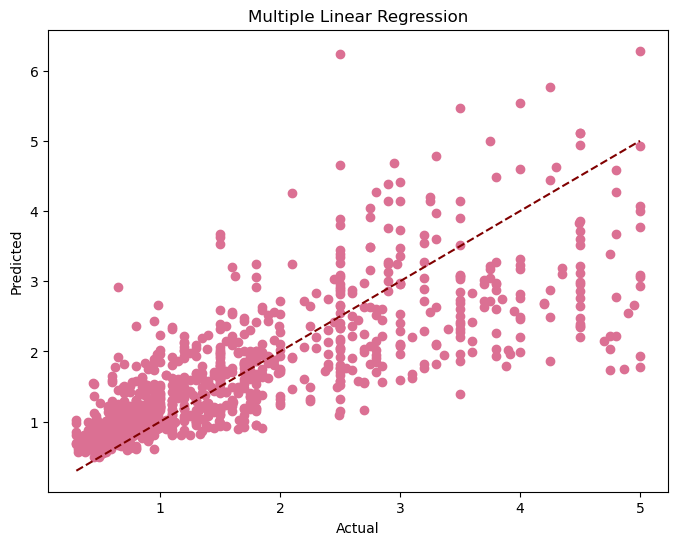

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='palevioletred')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='maroon', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

# Random Forest Regression


## Pendefinisian dan Modelling RFR

In [26]:
RF = RandomForestRegressor(n_estimators = 200,
                           criterion = 'friedman_mse',
                           max_depth = None, 
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           max_features = "auto",
                           bootstrap = True,
                           random_state = 0,
                           n_jobs = -1)

In [27]:
model_RF = RF.fit(X_train, y_train)
y_pred_rf = model_RF.predict(X_test)

## Evaluasi model

In [28]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

# evaluating the model
print("R squared :",r2_score(y_test, y_pred_rf))
print("Mean Squared Error : {}".format(mse))
print("Root Mean Squared Error : {}".format(rmse))

R squared : 0.7846714073637049
Mean Squared Error : 0.30298856035231225
Root Mean Squared Error : 0.550443966587256


## Membuat tabel perbandingan harga aktual dan prediksi

In [29]:
y_pred_rf

array([0.83717681, 0.65193625, 2.4382    , 1.53874   , 2.116875  ,
       0.7659875 , 0.42797518, 0.66443128, 0.48776962, 0.58092875,
       2.86875   , 0.55329574, 3.17975   , 2.84775   , 1.51578667,
       0.63046833, 1.38626714, 0.90594845, 1.1025925 , 1.04528167,
       0.55075417, 2.284     , 0.90852693, 4.52885   , 2.6236    ,
       0.91067158, 3.8429125 , 1.72118333, 0.61289292, 0.79645335,
       1.56043333, 1.75747917, 1.11628423, 0.43215625, 1.77615   ,
       2.7724025 , 2.41645417, 0.77421064, 1.50635   , 2.51924167,
       0.81800525, 1.68621   , 0.79829033, 0.81506554, 0.6155686 ,
       3.26169583, 1.80020714, 0.46261458, 3.004025  , 1.401015  ,
       1.23882292, 0.65383367, 0.987005  , 0.52261982, 3.345275  ,
       2.14256667, 1.11985809, 0.64818557, 1.6527    , 1.20085   ,
       3.03982833, 1.92851   , 2.04975   , 0.80107652, 1.41325   ,
       1.66756   , 1.491925  , 0.57649071, 1.36464167, 2.44725   ,
       1.9137119 , 0.51542917, 0.45062379, 0.57547085, 3.62307

In [30]:
y_test

1842    0.645
1824    0.640
5622    1.500
2861    0.800
6651    1.990
        ...  
2860    0.800
4443    1.200
1167    0.540
2669    0.770
7848    2.800
Name: Harga_New, Length: 954, dtype: float64

In [31]:
# Mengubah numpy array menjadi pandas Series
y_predict1 = pd.Series(y_pred_rf)

print(y_predict1)

0      0.837177
1      0.651936
2      2.438200
3      1.538740
4      2.116875
         ...   
949    0.945418
950    1.032719
951    0.720891
952    0.743635
953    2.795550
Length: 954, dtype: float64


In [32]:
kondisi_RF = pd.DataFrame({'Actual':y_test, 
                            'Predicted':y_pred_rf,
                            'Selisih': np.absolute(np.array(y_test) - np.array(y_pred_rf))})
print('Perbandingan harga asli dan prediksi model RFR :')
kondisi_RF.head(10)

Perbandingan harga asli dan prediksi model RFR :


,Actual,Predicted,Selisih
1842,0.645,0.837177,0.192177
1824,0.640,0.651936,0.011936
5622,1.500,2.438200,0.938200
2861,0.800,1.538740,0.738740
6651,1.990,2.116875,0.126875
2702,0.775,0.765987,0.009013
841,0.490,0.427975,0.062025
1536,0.595,0.664431,0.069431
1156,0.535,0.487770,0.047230
1478,0.585,0.580929,0.004071


In [33]:
# Membuat DataFrame kondisi1_GS
kondisi_RF = pd.DataFrame({'Actual': y_test,
                            'Predicted': y_pred_rf,
                            'Selisih': np.absolute(np.array(y_test) - np.array(y_pred_rf)),
                            'Rata-rata selisih': np.mean(np.absolute(np.array(y_test) - np.array(y_pred_rf)))})

# Menambahkan kolom 'Keterangan'
kondisi_RF['Keterangan'] = np.where(kondisi_RF['Selisih'] <= kondisi_RF['Rata-rata selisih'], 'Relevan', 'Tidak Relevan')

# Menampilkan 10 baris pertama
print(kondisi_RF.head(10))

      Actual  Predicted   Selisih  Rata-rata selisih     Keterangan
1842   0.645   0.837177  0.192177           0.370827        Relevan
1824   0.640   0.651936  0.011936           0.370827        Relevan
5622   1.500   2.438200  0.938200           0.370827  Tidak Relevan
2861   0.800   1.538740  0.738740           0.370827  Tidak Relevan
6651   1.990   2.116875  0.126875           0.370827        Relevan
2702   0.775   0.765987  0.009013           0.370827        Relevan
841    0.490   0.427975  0.062025           0.370827        Relevan
1536   0.595   0.664431  0.069431           0.370827        Relevan
1156   0.535   0.487770  0.047230           0.370827        Relevan
1478   0.585   0.580929  0.004071           0.370827        Relevan


## Membuat visualisasi model RFR

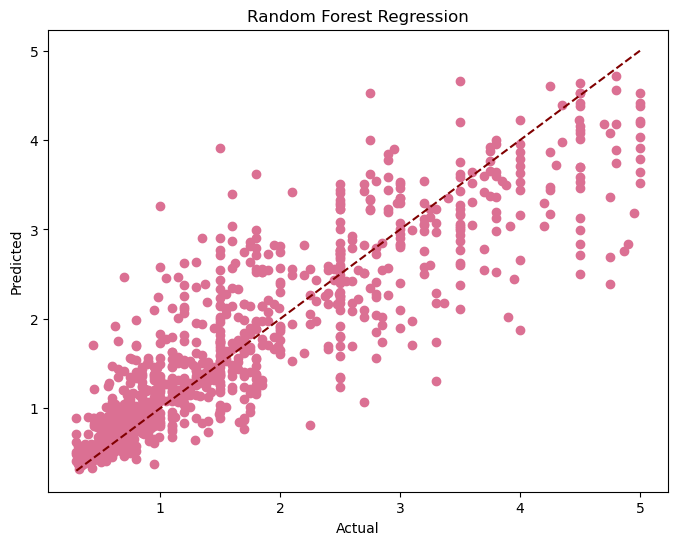

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='palevioletred')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='maroon', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()

In [ ]:
# !pip install pydotplus
# !pip install graphviz

In [54]:
# !pip install pydotplus graphviz

In [50]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import export_graphviz
# import graphviz

In [ ]:
# # Mengambil salah satu pohon keputusan dari Random Forest
# tree = RF.estimators_[0]

# # Ekspor pohon keputusan ke format dot file
# dot_data = export_graphviz(tree, 
#                            feature_names=df_Lencode.drop(columns=["Harga_New"]).columns,
#                            filled=True, rounded=True,
#                            special_characters=True)

# # Menggunakan pydotplus untuk membuat visualisasi pohon
# graph = pydotplus.graph_from_dot_data(dot_data)

# # Menampilkan gambar
# Image(graph.create_png())

# Variable Importance

In [35]:
# Mendapatkan feature importances dari model Random Forest
importances = RF.feature_importances_

# Membuat DataFrame dengan importances dan korelasi
feature_analysis = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Mengurutkan DataFrame berdasarkan Importance
feature_analysis = feature_analysis.sort_values(by='Importance', ascending=False)

# Menampilkan DataFrame
print(feature_analysis)

       Feature  Importance
5           LT    0.582662
6           LB    0.239076
1       Lokasi    0.080150
3           KM    0.041182
2           KT    0.037755
4       Garasi    0.018353
0  Jenis_Rumah    0.000822


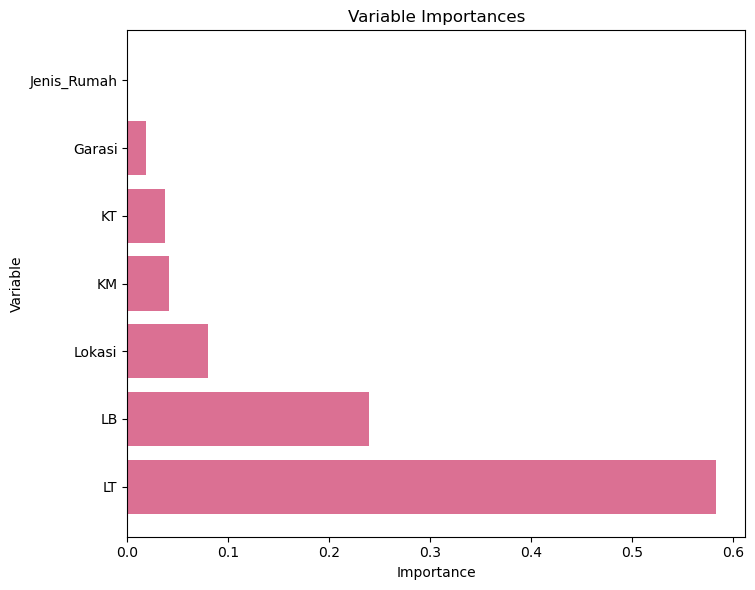

In [37]:
# Plotting bar chart untuk feature importances
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(feature_analysis['Feature'], feature_analysis['Importance'], color='palevioletred')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importances')

plt.tight_layout()
plt.show()

# Filter data serupa untuk perbandingan dengan hasil prediksi

In [36]:
# Define the seven conditions
condition1 = df_cleaning['Jenis_Rumah'] == "Rumah"
condition2 = df_cleaning['Lokasi'] == "Mijen, Semarang"
condition3 = df_cleaning['KT'] == 2
condition4 = df_cleaning['KM'] == 1
condition5 = df_cleaning['Garasi'] == 1
condition6 = df_cleaning['LT'] == 72
condition7 = df_cleaning['LB'] == 72

# Combine all conditions using the & operator
Validasi = df_cleaning.loc[condition1 & condition2 & condition3 & condition4 & condition5 & condition6 & condition7]

# Display the filtered DataFrame
Validasi

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB,Harga_New
22,Rumah,"Mijen, Semarang",2,1,1,72,72,0.300
302,Rumah,"Mijen, Semarang",2,1,1,72,72,0.385
464,Rumah,"Mijen, Semarang",2,1,1,72,72,0.425
1248,Rumah,"Mijen, Semarang",2,1,1,72,72,0.550


In [40]:
# Mengecek hasil prediksi apakah masuk dalam rentang harga aktual
# Memasukkan data 
input_data = [[0, 6, 2, 1, 1, 72, 72]]  # Data dalam bentuk list

# Konversi list ke array numpy
input_data_array = np.array(input_data)

# Lakukan prediksi menggunakan model RandomForestRegressor
prediction = model_RF.predict(input_data_array) 

# Cetak hasil prediksi
print("Prediksi harga:", prediction)

Prediksi harga: [0.41479526]


# Model Inference
Dipilih model dengan algoritma random forest regression dengan kondisi 1 sebagai model yang akan dilakukan deployment.

In [41]:
model_inference = {'Jenis_Rumah':[0,0,2,0,1],
                   'Lokasi':[14,2,10,14,12],
                   'KT':[2,4,4,3,1],
                   'KM':[1,1,3,1,3],
                   'Garasi':[1,2,3,1,2],
                   'LT':[60,95,616,150,87],
                   'LB':[30,84,450,120,76]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

,Jenis_Rumah,Lokasi,KT,KM,Garasi,LT,LB
0,0,14,2,1,1,60,30
1,0,2,4,1,2,95,84
2,2,10,4,3,3,616,450
3,0,14,3,1,1,150,120
4,1,12,1,3,2,87,76


In [42]:
prediksi = model_RF.predict(model_inference)
prediksi

array([0.48639892, 0.82105   , 4.22535   , 1.3982875 , 1.05540583])

# Deployment


In [44]:
import pickle

filename = 'prediksi_harga_rumah_smg.sav'
pickle.dump(model_RF, open(filename,'wb'))

In [32]:
# import gzip
# with gzip.open('prediksi_harga_rumah_semarang.sav.gz', 'wb') as f:
#     pickle.dump(model_RF, f)